<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/pytorch/sentdex_p2_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Based on Video [Sentdex](https://www.youtube.com/watch?v=i2yPxY2rOzs)

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

# Building Model class

train and test datasets in tensor format

In [2]:
train = datasets.MNIST("", train=True, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )
test  = datasets.MNIST("", train=False, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Making DataLoader for one batch a time.

Dataloader is an iterator

*   batch_size: how many images you want to load and pass to model at a time
*   shuffle: If you want to shuffle the whole set while taking <batch_size> images at a time?

Why shuffling is important? In simple terms, If we don't shuffle and initally model learns all 0s, it think everything is 0, then we pass 1s and then model thinks everything is a 1 and so on, it is harder for model to generalize. If we pass all images randomly, it's **easier for model to generalize** from start.




In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [15]:
print(f"There are {len(trainset)} images in train")

print(f"There are {len(testset)} images in test")

There are 6000 images in train
There are 1000 images in test


In [22]:
for data in trainset:
  # each batch contains feature and target
  # there are 10 features and 10 targets in each batch
  print(data)
  print(len(data))
  print(len(data[0]), len(data[1]))
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [16]:
x, y  = data[0][0], data[1][0]

In [24]:
x.shape

torch.Size([1, 28, 28])

Here, we see the image size was 28 x 28, but the tensor size is 1 x 28 x 28
Pytorch requre this kind of diemension(first dimension should be 1).
If we use image input, we must convert the data to this type of dimension

In [17]:
import matplotlib.pyplot as plt

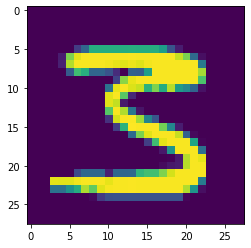

In [29]:
plt.imshow(x.view(28,28))
#plt.imshow(x[0]) also works

In [42]:
distribution = {}

for _, y in trainset:
  for target in y:
    if int(target) not in distribution:
      distribution[int(target)] = 0
    distribution[int(target)] += 1

print(distribution)

{8: 5851, 7: 6265, 9: 5949, 2: 5958, 1: 6742, 6: 5918, 4: 5842, 0: 5923, 3: 6131, 5: 5421}


Here we see the images are well balanced i.e. all numbers are almost eaually respresented, which is a good thing.